In [21]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import HTML
from matplotlib.animation import FuncAnimation

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

In [22]:
def download_and_unzip(url, save_path):
  print(f"Downloading and extracting assests....", end="")

  # Downloading zip file using urllib package.
  urlretrieve(url, save_path)

  try:
  # Extracting zip file using the zipfile package.
    with ZipFile(save_path) as z:
      # Extract ZIP file contents in the same directory.
      z.extractall(os.path.split(save_path)[0])

    print("\nDone")

  except Exception as e:
    print("\nInvalid file.", e)

In [23]:
URL = r"https://www.dropbox.com/s/ld535c8e0vueq6x/opencv_bootcamp_assets_NB11.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB11.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
  download_and_unzip(URL, asset_zip_path)

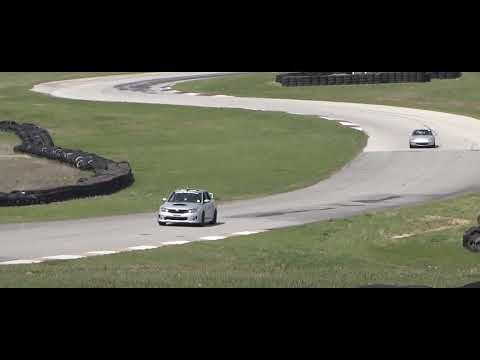

In [24]:
video = YouTubeVideo("XkJCvtCRdVM", width=1024, height=640)
display(video)

- `draw_rectangle`: A function that takes two parameters: frame (an image frame from the video) and bbox (a bounding box specifying the area to draw a rectangle around).
  - `bbox`: This is expected to be a tuple containing four values: (x, y, width, height), where (x, y) is the top-left corner of the rectangle.
  - `p1` and `p2`: These variables calculate the top-left and bottom-right corners of the rectangle using the bounding box coordinates.
  - `cv2.rectangle(...)`: This function draws a rectangle on the frame image using the calculated points, with the color red (0, 0, 255), a thickness of 2, and line type 1 (which is connected).

  <br>

- `display_rectangle`: This function takes a frame and a bbox as parameters and displays the rectangle drawn on the frame.
  - `plt.figure(figsize=(20, 10))`: This sets up a figure for displaying the image with specified dimensions.
  - `frame_copy = frame.copy()`: Creates a copy of the frame to avoid modifying the original.
  - `draw_rectangle(frame_copy, bbox)`: Calls the previously defined function to draw a rectangle on the copied frame.
  - `cv2.cvtColor(frame_copy, cv2.COLOR_RGB2BGR)`: Converts the frame from RGB color format to BGR, which is the format used by OpenCV for displaying images.
  - `plt.imshow(frame_copy)`: Displays the image with the drawn rectangle.
  - `plt.axis("off")`: Hides the axis ticks and labels for a cleaner display.

In [25]:
video_input_filename = "race_car.mp4"

def draw_rectangle(frame, bbox):
  p1 = (int(bbox[0]), int(bbox[1]))
  p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
  cv2.rectangle(frame, p1, p2, (0, 0, 255), 2, 1)


def display_rectangle(frame, bbox):
  plt.figure(figsize=(20, 10))
  frame_copy = frame.copy()
  draw_rectangle(frame_copy, bbox)
  frame_copy = cv2.cvtColor(frame_copy, cv2.COLOR_RGB2BGR)
  plt.imshow(frame_copy)
  plt.axis("off")


def draw_text(frame, txt, location, color=(50, 170, 50)):
  cv2.putText(frame, txt, location, cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

In [26]:
# Set up tracker
tracker_types = [
  "BOOSTING",
  "MIL",
  "KCF",
  "CSRT",
  "TLD",
  "MEDIANFLOW",
  "GOTURN",
  "MOSSE",
]

# Change the index to change the tracker type
tracker_type = tracker_types[2]

if tracker_type == "BOOSTING":
  tracker = cv2.legacy.TrackerBoosting.create()
elif tracker_type == "MIL":
  tracker = cv2.legacy.TrackerMIL.create()
elif tracker_type == "KCF":
  tracker = cv2.TrackerKCF.create()
elif tracker_type == "CSRT":
  tracker = cv2.TrackerCSRT.create()
elif tracker_type == "TLD":
  tracker = cv2.legacy.TrackerTLD.create()
elif tracker_type == "MEDIANFLOW":
  tracker = cv2.legacy.TrackerMedianFlow.create()
elif tracker_type == "GOTURN":
  tracker = cv2.TrackerGOTURN.create()
else:
  tracker = cv2.legacy.TrackerMOSSE.create()

In [27]:
video = cv2.VideoCapture(video_input_filename)
ok, frame = video.read()

if not video.isOpened():
  print("Could not open vide")
  sys.exit()
else:
  width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
  height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))


video_output_filename = "race_car_" + tracker_type + ".mp4"
video_out = cv2.VideoWriter(video_output_filename, cv2.VideoWriter_fourcc(*"XVID"), 10, (width, height))

video_output_filename

'race_car_KCF.mp4'

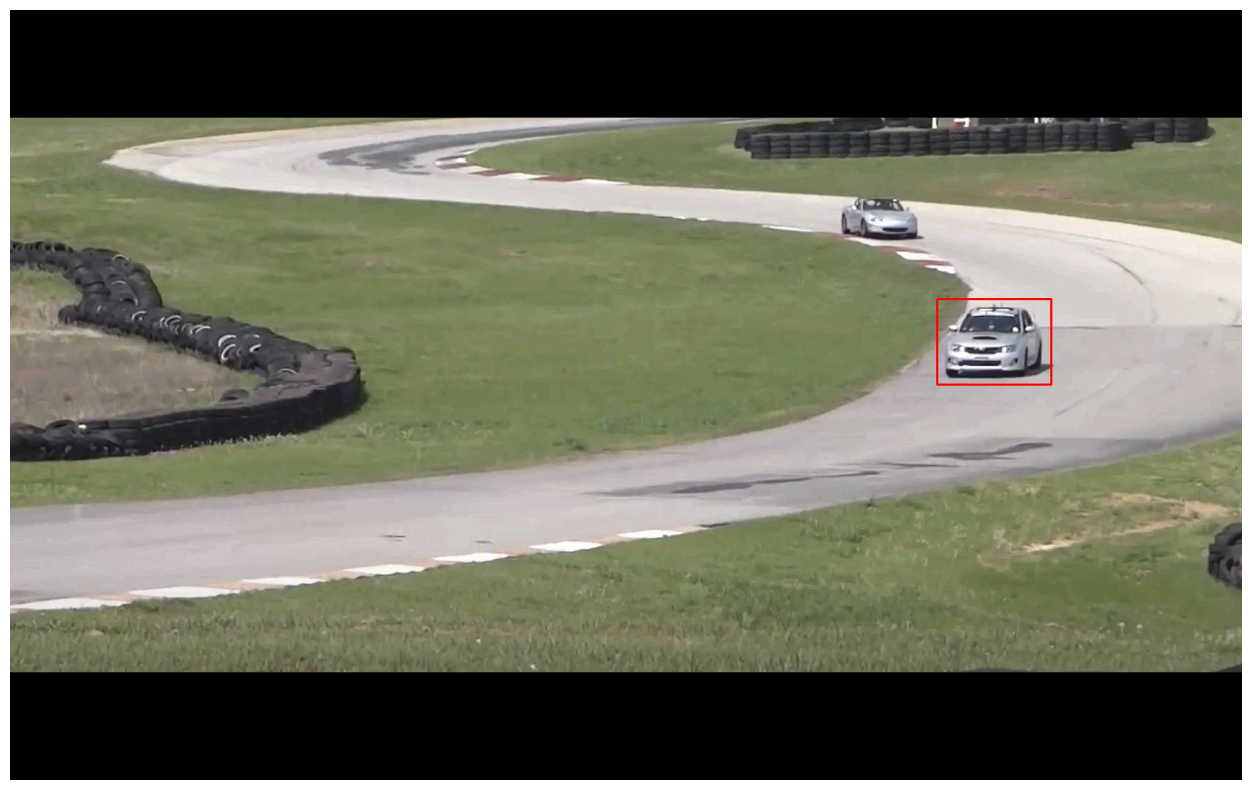

In [28]:
bbox = (1300, 405, 160, 120)
# bbox = cv2.selectROI(frame, False)
# print(bbox)
display_rectangle(frame, bbox)

ok: This variable will store the result of initializing the tracker with the first frame and the bounding box. It will be True if initialization is successful.

In [29]:
ok = tracker.init(frame, bbox)

- `while True`: This creates an infinite loop to process each frame of the video until all frames are read.
- `ok, frame` = video.read(): Reads the next frame of the video.
If reading the frame fails (not ok), the loop breaks.
- `timer` = cv2.getTickCount(): Records the current tick count to measure the time taken for processing.
- `ok, bbox` = tracker.update(frame): Updates the tracker with the current frame. It returns:
  - `ok`: A boolean indicating whether tracking was successful.
  - `bbox`: The updated bounding box for the tracked object.
- `fps` = cv2.getTickFrequency() / (cv2.getTickCount() - timer): Calculates the frames per second (FPS) based on the time taken to process the frame.

Drawing:

- If tracking is successful (if ok:), it draws the updated rectangle around the tracked object.
- If tracking fails, it overlays a message indicating a tracking failure.
- Overlaying Text: Draws the tracker type and FPS on the frame for reference.
video_out.write(frame): Writes the processed frame with the drawn rectangle and text to the output video file.

In [30]:
while True:
  ok, frame = video.read()

  if not ok:
    break

  timer = cv2.getTickCount()

  ok, bbox = tracker.update(frame)
  print(ok)
  print(bbox)

  fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)

  if ok:
    draw_rectangle(frame, bbox)
  else:
    draw_text(frame, "Tracking failure detected", (80, 140), (255, 0, 0))

  draw_text(frame, tracker_type + " Tracker", (80, 60))
  draw_text(frame, "FPS: " + str(int(fps)), (80, 100))

  video_out.write(frame)


video.release()
video_out.release()

True
(1300, 405, 160, 120)
True
(1280, 409, 160, 120)
True
(1264, 405, 160, 120)
True
(1254, 395, 160, 120)
True
(1246, 389, 160, 120)
True
(1236, 389, 160, 120)
True
(1230, 385, 160, 120)
True
(1218, 385, 160, 120)
True
(1200, 391, 160, 120)
True
(1182, 397, 160, 120)
True
(1174, 409, 160, 120)
True
(1168, 421, 160, 120)
True
(1150, 433, 160, 120)
True
(1130, 447, 160, 120)
True
(1114, 455, 160, 120)
True
(1096, 465, 160, 120)
True
(1074, 471, 160, 120)
True
(1048, 473, 160, 120)
True
(1032, 473, 160, 120)
True
(1024, 471, 160, 120)
True
(1012, 467, 160, 120)
True
(992, 471, 160, 120)
True
(976, 473, 160, 120)
True
(962, 479, 160, 120)
True
(946, 481, 160, 120)
True
(930, 487, 160, 120)
True
(922, 491, 160, 120)
True
(920, 491, 160, 120)
True
(912, 493, 160, 120)
True
(894, 499, 160, 120)
True
(874, 501, 160, 120)
True
(864, 505, 160, 120)
True
(860, 507, 160, 120)
True
(852, 507, 160, 120)
True
(834, 509, 160, 120)
True
(822, 511, 160, 120)
True
(818, 511, 160, 120)
True
(812, 513, 1

In [31]:
!apt-get -qq install ffmpeg

# Change video encoding of mp4 file from XVID to h264
!ffmpeg -y -i {video_output_filename} -c:v libx264 $"race_car_track_x264.mp4"  -hide_banner -loglevel error

In [32]:
mp4 = open("/content/race_car_track_x264.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""<video width=1024 controls><source src="{data_url}" type="video/mp4"></video>""")

Output hidden; open in https://colab.research.google.com to view.

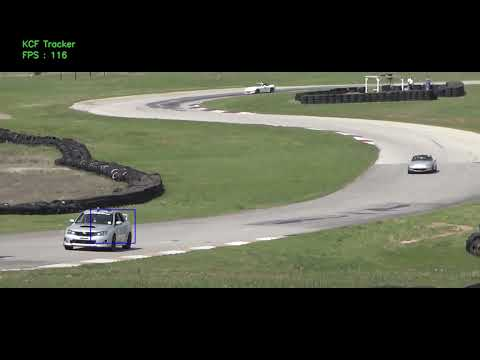

In [33]:
# Tracker: KCF
video = YouTubeVideo("pk3tmdRX4ww", width=1024, height=640)
display(video)

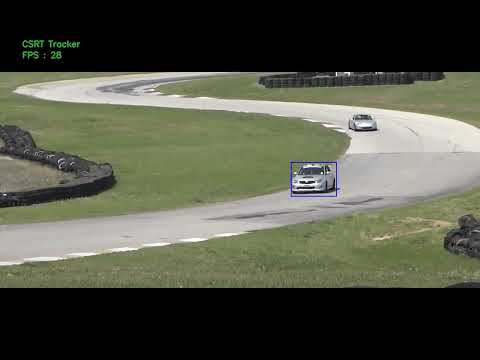

In [34]:
video = YouTubeVideo("6gGDf-7ypBE", width=1024, height=640)
display(video)

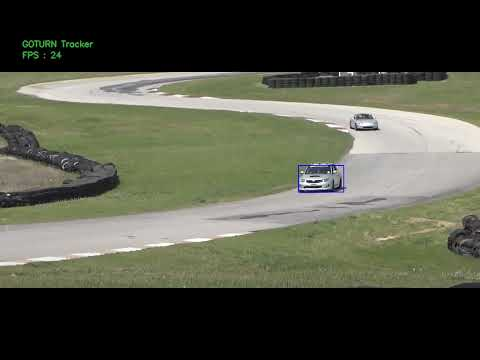

In [35]:
video = YouTubeVideo("0bnWxc4zMvY", width=1024, height=640)
display(video)